인하공업전문대학교

컴퓨터정보과 3학년 B반

201844045 김연욱

3학년 2학기 빅데이터 교과목 기말고사 프로젝트

주제 : 미세먼지 분석

csv파일 주의 사항

1. *의 값은 자료 획득율이 50% 이상이나 75% 미만인 도시의 월평균 값임

2. **의 값은 자료 획득율이 50% 미만인 측정소의 월평균 값임

3. 관측점 수치가 없는 경우는  장비교체, 장비점검 등으로 인한 결측

In [ ]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
#  폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
# 추가 import문
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# 구글드라이브 연동
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 전역변수 선언부
start_year = 2010
end_year = 2020 # 2021년까지 존재하지만 11월, 12월 데이터 부재로 인한 제외
df_dic = dict() # keys : 각 년도  values : 각 년도에 해당하는 csv파일의 DataFrame

In [ ]:
# 2010년부터 2020년까지의 csv파일 불러오기 (2021년 csv파일도 존재는 하나 11월, 12월 데이터의 부재로 인해 제외)
for year in range(start_year, end_year + 1):
  df = pd.read_csv(f'/content/drive/MyDrive/빅데이터 프로젝트/미세먼지 자료/{year}.csv', encoding='cp949') # encoding을 안하면 오류남 -> cp949는 euc-kr의 확장버전
  df_dic[f'{year}년'] = df

In [ ]:
# 미세먼지 데이터프레임의 요약 정보
for year in df_dic.keys():
  print(f'--------------{year} 데이터프레임 요약 정보--------------')
  df_dic[year].info()
  print('\n')

--------------2010년 데이터프레임 요약 정보--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분(1)    301 non-null    object
 1   구분(2)    301 non-null    object
 2   구분(3)    301 non-null    object
 3   구분(4)    301 non-null    object
 4   2010.01  301 non-null    object
 5   2010.02  301 non-null    object
 6   2010.03  301 non-null    object
 7   2010.04  301 non-null    object
 8   2010.05  301 non-null    object
 9   2010.06  301 non-null    object
 10  2010.07  301 non-null    object
 11  2010.08  301 non-null    object
 12  2010.09  301 non-null    object
 13  2010.10  301 non-null    object
 14  2010.11  301 non-null    object
 15  2010.12  301 non-null    object
dtypes: object(16)
memory usage: 37.8+ KB


--------------2011년 데이터프레임 요약 정보--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total

In [ ]:
# 2010년 미세먼지 데이터프레임 앞부분 5행
df_dic['2010년'].head() # 5(default) 

,구분(1),구분(2),구분(3),구분(4),2010.01,2010.02,2010.03,2010.04,2010.05,2010.06,2010.07,2010.08,2010.09,2010.10,2010.11,2010.12
0,도시대기,서울,중구,서소문동,58,50,65,51,57,48,30,31,25,40,70,63
1,도시대기,서울,종로구,효제동,59,50,57,49,56,56,42,39,31,44,75,44
2,도시대기,서울,중랑구,면목동,60,48,63,49,55,50,31,32,24,41,75,66
3,도시대기,서울,동대문구,용두동,63,52,65,51,58,53,33,33,27,44,76,68
4,도시대기,서울,은평구,불광동,52,46,60,48,56,48,32,31,23,36,68,62


In [ ]:
# 2020년 미세먼지 데이터프레임 뒷부분 7행
df_dic['2020년'].tail(7)

,구분(1),구분(2),구분(3),구분(4),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12
573,도로변대기,경기,시도평균,소계,49,45,49,47,40,43,25,25,24,40,48,45
574,도로변대기,강원,춘천,온의동,-,-,-,-,35,40,21,20,22,36,48,52
575,도로변대기,충북,청주,복대동,50,48,48,47,35,37,18,26,28,41,45,46
576,도로변대기,충남,천안,성성동,66,58,57,51,44,43,28,25,29,48,52,51
577,도로변대기,전북,전주,서신동,-,-,-,40**,38,44,22,27,26,36,38,38
578,도로변대기,경남,창원,반송로,28,31,29,32,30,28,19,33,23,27,29,28
579,도로변대기,제주,제주,노형로,32,37,44,48,44,31,20,28,30,33,29,27


In [ ]:
# 함수 정의
def changeColumns(df): # 데이터프레임의 컬럼명을 변경하는 함수
  df.columns = ['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
  return df

In [ ]:
# 데이터프레임의 컬럼명 변경
for df in df_dic.values(): # key값이 아닌 value로 DataFrame을 바로 추출함
  changeColumns(df) # 컬럼명 변경 함수 호출

In [ ]:
# 데이터프레임 컬럼명 변경 확인
for year in df_dic.keys():
  print(f'{year} 컬럼명')
  print(df_dic[year].columns, '\n')

2010년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2011년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2012년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2013년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2014년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2015년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2016년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
 

In [ ]:
# 미세먼지 데이터프레임의 고유값 보기 (2010년 ~ 2013년) 2014 10부터 '-' '*'이 나옴
for year in df_dic.keys():
  for col in df_dic[year].columns:
    print(f'{year} col : {col}')
    print(df_dic[year][col].unique(), '\n')

2010년 col : 구분1
['도시대기' '국가배경농도' '교외대기' '도로변대기'] 

2010년 col : 구분2
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주'] 

2010년 col : 구분3
['중구' '종로구' '중랑구' '동대문구' '은평구' '마포구' '영등포구' '동작구' '관악구' '강남구' '금천구' '강동구'
 '강북구' '성북구' '용산구' '광진구' '성동구' '도봉구' '서대문구' '구로구' '서초구' '강서구' '송파구' '양천구'
 '노원구' '남구' '사상구' '북구' '사하구' '부산진구' '연제구' '영도구' '금정구' '해운대구' '기장군' '수영구'
 '동래구' '서구' '동구' '수성구' '달서구' '달성군' '남동구' '부평구' '계양구' '강화군' '연수구' '미추홀구'
 '광산구' '대덕구' '유성구' '울주군' '수원' '안양' '성남' '의정부' '광명' '안산' '평택' '과천' '구리'
 '의왕' '고양' '광주' '군포' '시흥' '부천' '남양주' '용인' '김포' '오산' '하남' '화성' '양주' '동두천'
 '안성' '이천' '파주' '포천' '춘천' '강릉' '원주' '동해' '삼척' '청주' '충주' '제천' '천안' '당진'
 '서산' '아산' '전주' '군산' '익산' '남원' '정읍' '고창' '여수' '광양' '순천' '목포' '영암' '포항'
 '구미' '김천' '경주' '안동' '영주' '창원' '진주' '하동' '김해' '양산' '제주' '서귀포' '울릉군' '북제주'
 '옹진군' '양구' '고성' '정선' '횡성' '괴산' '태안' '공주' '임실' '화순' '영덕' '영천' '의성' '거제'
 '거창' '서울' '부산' '대구' '인천' '대전' '울산' '시도평균'] 

2010년 col : 구분4
['서소문동' '효제동' '면목동' '용두동' '불광동' '대흥동' '당산동' '

In [ ]:
# 데이터상 별표(*) 없애는 함수
def delStar(data):
  if (len(data) > 2):
    return data.replace('*', '')
  else:
    return data

In [ ]:
# 데이터 표준화 과정
for df in df_dic.values():
  for month in range(1, 13):
    df[f'{month}월'] = df[f'{month}월'].astype(str) # 열의 데이터가 전부 정수일 경우 그 열은 타입이 int로 되어서 표준화? 정규화?를 위해 str타입으로 전부 변경
                                                    # object로 변경시 int형의 len을 할 수 없음
    df[f'{month}월'] = df.apply(lambda x: delStar(x[f'{month}월']), axis = 1) # 람다식을 이용한 별표(*) 없애기

In [ ]:
# 데이터상 별표(*) 제거 확인 (고유값 확인)
for year in df_dic.keys():
  for col in df_dic[year].columns:
    print(f'{year} col : {col}')
    print(df_dic[year][col].unique(), '\n')

2010년 col : 구분1
['도시대기' '국가배경농도' '교외대기' '도로변대기'] 

2010년 col : 구분2
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주'] 

2010년 col : 구분3
['중구' '종로구' '중랑구' '동대문구' '은평구' '마포구' '영등포구' '동작구' '관악구' '강남구' '금천구' '강동구'
 '강북구' '성북구' '용산구' '광진구' '성동구' '도봉구' '서대문구' '구로구' '서초구' '강서구' '송파구' '양천구'
 '노원구' '남구' '사상구' '북구' '사하구' '부산진구' '연제구' '영도구' '금정구' '해운대구' '기장군' '수영구'
 '동래구' '서구' '동구' '수성구' '달서구' '달성군' '남동구' '부평구' '계양구' '강화군' '연수구' '미추홀구'
 '광산구' '대덕구' '유성구' '울주군' '수원' '안양' '성남' '의정부' '광명' '안산' '평택' '과천' '구리'
 '의왕' '고양' '광주' '군포' '시흥' '부천' '남양주' '용인' '김포' '오산' '하남' '화성' '양주' '동두천'
 '안성' '이천' '파주' '포천' '춘천' '강릉' '원주' '동해' '삼척' '청주' '충주' '제천' '천안' '당진'
 '서산' '아산' '전주' '군산' '익산' '남원' '정읍' '고창' '여수' '광양' '순천' '목포' '영암' '포항'
 '구미' '김천' '경주' '안동' '영주' '창원' '진주' '하동' '김해' '양산' '제주' '서귀포' '울릉군' '북제주'
 '옹진군' '양구' '고성' '정선' '횡성' '괴산' '태안' '공주' '임실' '화순' '영덕' '영천' '의성' '거제'
 '거창' '서울' '부산' '대구' '인천' '대전' '울산' '시도평균'] 

2010년 col : 구분4
['서소문동' '효제동' '면목동' '용두동' '불광동' '대흥동' '당산동' '

In [ ]:
# '-' 표준화
for df in df_dic.values():
  for month in range(1, 13):
    df.replace('-', np.nan, inplace = True) # 누락 데이터 표준화
    df.loc[:, '1월':'12월'] = df.loc[:, '1월':'12월'].astype(float) # 1월부터 12월의 열 타입을 float으로 변경 (mean()을 위해) 그리고 NaN은 float형

In [ ]:
# 데이터상 누락 데이터 표준화 확인
for year in df_dic.keys():
  for col in df_dic[year].columns:
    print(f'{year} col : {col}')
    print(df_dic[year][col].unique(), '\n')

2010년 col : 구분1
['도시대기' '국가배경농도' '교외대기' '도로변대기'] 

2010년 col : 구분2
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주'] 

2010년 col : 구분3
['중구' '종로구' '중랑구' '동대문구' '은평구' '마포구' '영등포구' '동작구' '관악구' '강남구' '금천구' '강동구'
 '강북구' '성북구' '용산구' '광진구' '성동구' '도봉구' '서대문구' '구로구' '서초구' '강서구' '송파구' '양천구'
 '노원구' '남구' '사상구' '북구' '사하구' '부산진구' '연제구' '영도구' '금정구' '해운대구' '기장군' '수영구'
 '동래구' '서구' '동구' '수성구' '달서구' '달성군' '남동구' '부평구' '계양구' '강화군' '연수구' '미추홀구'
 '광산구' '대덕구' '유성구' '울주군' '수원' '안양' '성남' '의정부' '광명' '안산' '평택' '과천' '구리'
 '의왕' '고양' '광주' '군포' '시흥' '부천' '남양주' '용인' '김포' '오산' '하남' '화성' '양주' '동두천'
 '안성' '이천' '파주' '포천' '춘천' '강릉' '원주' '동해' '삼척' '청주' '충주' '제천' '천안' '당진'
 '서산' '아산' '전주' '군산' '익산' '남원' '정읍' '고창' '여수' '광양' '순천' '목포' '영암' '포항'
 '구미' '김천' '경주' '안동' '영주' '창원' '진주' '하동' '김해' '양산' '제주' '서귀포' '울릉군' '북제주'
 '옹진군' '양구' '고성' '정선' '횡성' '괴산' '태안' '공주' '임실' '화순' '영덕' '영천' '의성' '거제'
 '거창' '서울' '부산' '대구' '인천' '대전' '울산' '시도평균'] 

2010년 col : 구분4
['서소문동' '효제동' '면목동' '용두동' '불광동' '대흥동' '당산동' '

In [ ]:
# 미세먼지 데이터프레임의 1월부터 12월 통계정보
for year in df_dic.keys():
  print(f'--------------{year} 데이터프레임 통계정보--------------')
  print(df_dic[year].loc[:,'1월':'12월'].describe(), '\n')

--------------2010년 데이터프레임 통계정보--------------
               1월          2월          3월          4월          5월          6월  \
count  295.000000  297.000000  297.000000  297.000000  297.000000  296.000000   
mean    57.596610   49.558923   64.299663   51.080808   58.865320   51.689189   
std     13.296334   10.026185    9.387731    9.281277    9.585077   12.109865   
min     29.000000   25.000000   43.000000   21.000000   22.000000   17.000000   
25%     47.000000   43.000000   58.000000   44.000000   52.000000   43.000000   
50%     57.000000   49.000000   65.000000   52.000000   58.000000   51.000000   
75%     65.000000   56.000000   70.000000   56.000000   65.000000   58.250000   
max    111.000000   86.000000  102.000000   78.000000   90.000000   95.000000   

               7월          8월          9월         10월         11월         12월  
count  293.000000  297.000000  291.000000  298.000000  298.000000  298.000000  
mean    36.156997   36.205387   32.336770   45.375839   73.32885

In [ ]:
df_dic['2020년']['1월'].value_counts().sort_index()
df_dic['2020년'].loc[df_dic['2020년']['1월'] <= 33, '1월'].count()
df_dic['2020년']['1월'].value_counts().sort_index()
# describe에서 25%란 전체 데이터 개수의 25%째 개수가 해당되는 값 

17.0     1
19.0     1
21.0     2
22.0     3
23.0     4
24.0     5
25.0    12
26.0    16
27.0    16
28.0    12
29.0     9
30.0    14
31.0     6
32.0    12
33.0    11
34.0    10
35.0    13
36.0    20
37.0    16
38.0    18
39.0    17
40.0    20
41.0    24
42.0    18
43.0    26
44.0    14
45.0    16
46.0    21
47.0    21
48.0    11
49.0    16
50.0    17
51.0     6
52.0    12
53.0     4
54.0     5
55.0     3
56.0     2
57.0     3
58.0     2
59.0     2
60.0     2
66.0     1
Name: 1월, dtype: int64

In [ ]:
### 보류 (아직 안 쓰임)
year_group = df_dic['2013년'].groupby(['구분2'])
for key, group in year_group:
    test = year_group.get_group(key).iloc[:, 3:].mean()
    # print(test.index)
    # print()
    print('key : ', key)
    print(year_group.get_group(key))
    print(f'평균 : {test}')
    print('타입 : ', type(group.iloc[0, 4]))
    print('test타입 : ', type(test))

key :  강원


<ipython-input-22-170cd24431bd>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = year_group.get_group(key).iloc[:, 3:].mean()
<ipython-input-22-170cd24431bd>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = year_group.get_group(key).iloc[:, 3:].mean()
<ipython-input-22-170cd24431bd>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = year_group.get_group(key).iloc[:, 3:].mean()
<ipython-input-22-170cd24431bd>:4: FutureWarning: Dropping of nuisance columns in DataFrame

      구분1 구분2 구분3  구분4     1월    2월    3월    4월    5월    6월    7월    8월    9월  \
170  도시대기  강원  춘천  중앙로   62.0  44.0  57.0  50.0  57.0  35.0  30.0  34.0  25.0   
171  도시대기  강원  춘천  석사동   94.0  71.0  87.0  76.0  80.0  51.0  45.0  48.0  33.0   
172  도시대기  강원  강릉  옥천동   55.0  47.0  55.0  45.0  44.0  30.0  29.0  33.0  31.0   
173  도시대기  강원  원주  중앙동   94.0  69.0  83.0  67.0  69.0  45.0  36.0  41.0  33.0   
174  도시대기  강원  원주  명륜동  101.0  73.0  88.0  73.0  78.0  52.0  41.0  45.0  37.0   
175  도시대기  강원  동해  천곡동   45.0  43.0  53.0  44.0  43.0  32.0  29.0  32.0  28.0   
176  도시대기  강원  삼척  남양동   51.0  46.0  57.0  47.0  47.0  39.0  38.0  41.0  33.0   
264  교외대기  강원  양구  방산면   64.0  52.0  61.0  55.0  63.0  41.0  47.0  47.0  35.0   
265  교외대기  강원  고성  간성읍   42.0  33.0  46.0  38.0  42.0  25.0  28.0  29.0  23.0   
266  교외대기  강원  정선  북평면   39.0  28.0  38.0  30.0  36.0  24.0  26.0  31.0  22.0   
267  교외대기  강원  횡성  치악산   61.0  45.0  62.0  51.0  54.0  36.0  35.0  37.0  29.0   

      10월   11월   12월  
170

<ipython-input-22-170cd24431bd>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = year_group.get_group(key).iloc[:, 3:].mean()
<ipython-input-22-170cd24431bd>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = year_group.get_group(key).iloc[:, 3:].mean()
<ipython-input-22-170cd24431bd>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = year_group.get_group(key).iloc[:, 3:].mean()
<ipython-input-22-170cd24431bd>:4: FutureWarning: Dropping of nuisance columns in DataFrame

       년도   미세먼지 합  데이터 개수   연 평균
0   2010년  14644.0   299.0  48.98
1   2011년  14282.0   300.0  47.61
2   2012년  12339.0   300.0  41.13
3   2013년  13391.0   300.0  44.64
4   2014년  13812.0   300.0  46.04
5   2015년  13659.0   300.0  45.53
6   2016년  14342.0   300.0  47.81
7   2017년  13131.0   300.0  43.77
8   2018년  11970.0   300.0  39.90
9   2019년  12485.0   299.0  41.76
10  2020년  10600.0   300.0  35.33


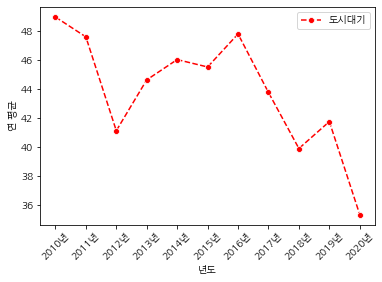

In [ ]:
# 10주차 9p~ lineplot

# 서울의 년도별 도시대기의 미세먼지 평균 변화량 구해보기
my_df = pd.DataFrame(index = df_dic.keys())
# print(my_df)
for year in df_dic.keys():
  grouped = df_dic[year].groupby(['구분1', '구분2'])
  my_df.loc[year, '미세먼지 합'] = grouped.get_group(("도시대기", "서울")).sum()['1월':'12월'].sum()
  my_df.loc[year, '데이터 개수'] = grouped.get_group(("도시대기", "서울")).count()['1월':'12월'].sum()
  my_df.loc[year, '연 평균'] = round(my_df.loc[year, '미세먼지 합'] / my_df.loc[year, '데이터 개수'], 2)
# print(my_df)  
my_df.reset_index(inplace = True) # 행 인덱스 초기화
my_df.rename(columns = {'index' : '년도'}, inplace = True)
sns.lineplot(data = my_df, x = '년도' , y = '연 평균', marker = 'o', color = 'r', linestyle = '--', label = '도시대기')
plt.xticks(rotation=45) # x축 회전 / x축 간격도 설정 가능할 듯
print(my_df)

      구분1 구분2   구분3   구분4    1월    2월    3월    4월    5월    6월    7월    8월  \
0    도시대기  서울    중구  서소문동  58.0  50.0  65.0  51.0  57.0  48.0  30.0  31.0   
1    도시대기  서울   종로구   효제동  59.0  50.0  57.0  49.0  56.0  56.0  42.0  39.0   
2    도시대기  서울   중랑구   면목동  60.0  48.0  63.0  49.0  55.0  50.0  31.0  32.0   
3    도시대기  서울  동대문구   용두동  63.0  52.0  65.0  51.0  58.0  53.0  33.0  33.0   
4    도시대기  서울   은평구   불광동  52.0  46.0  60.0  48.0  56.0  48.0  32.0  31.0   
..    ...  ..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
235  도시대기  경남    양산   북부동  35.0  34.0  54.0  36.0  42.0  33.0  28.0  27.0   
236  도시대기  경남    양산   웅상읍  36.0  33.0  52.0  36.0  44.0  36.0  25.0  28.0   
237  도시대기  제주    제주   이도동  45.0  44.0  76.0  55.0  68.0  44.0  35.0  32.0   
238  도시대기  제주    제주    연동  61.0  42.0  66.0  44.0  53.0  34.0  27.0  26.0   
239  도시대기  제주   서귀포   동홍동  56.0  38.0  70.0  43.0  52.0  34.0  30.0  27.0   

       9월   10월    11월   12월  
0    25.0  40.0   70.0  63.0  
1    31.0  44

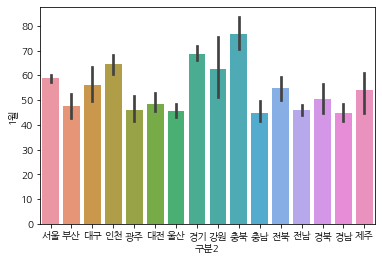

In [ ]:
# 10주차 14p barplot

# 2010년 구분2를 기준으로 각 지역 도시대기 미세먼지 데이터
###################
# 2010년 각 지역의 연 평균
grouped = df_dic['2010년'].groupby(['구분1'])
print(grouped.get_group('도시대기'))

my_df = pd.DataFrame(index = grouped.get_group('도시대기')['구분2'].unique()) # columns = ['미세먼지 합', '데이터 개수', '평균']
# for area in my_df.index:
#   my_df.loc[area, '미세먼지 합'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].sum()['1월':'12월'].sum()
#   my_df.loc[area, '데이터 개수'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].count()['1월':'12월'].sum()
#   my_df.loc[area, '평균'] = round(my_df.loc[area, '미세먼지 합'] / my_df.loc[area, '데이터 개수'], 2)
#   my_df.loc[area, '최대값'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].max()['1월':'12월'].max()
#   my_df.loc[area, '최소값'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].min()['1월':'12월'].min()
for area in my_df.index:
  my_df.loc[area, '미세먼지 합'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].sum()['1월'].sum() # -> 1월만 할거면 맨 뒤 sum 필요 없음
  my_df.loc[area, '데이터 개수'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].count()['1월'].sum() # -> 1월만 할거면 맨 뒤 sum 필요 없음
  my_df.loc[area, '평균'] = round(my_df.loc[area, '미세먼지 합'] / my_df.loc[area, '데이터 개수'], 2)
  my_df.loc[area, '최대값'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].max()['1월'].max()
  my_df.loc[area, '최소값'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].min()['1월'].min()
###################
sns.barplot(data = grouped.get_group('도시대기'), x = '구분2', y = '1월')
print(my_df)

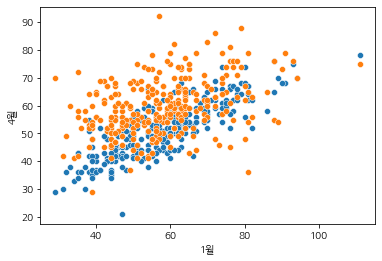

In [ ]:
# 10주차 17p scatterplot

# data쓰면 해당 column명으로 가능하고 data안쓰면 데이터프레임까지 써서 쓰면 됨
sns.scatterplot(data = df_dic['2010년'], x = '1월', y = df_dic['2010년']['4월'])
sns.scatterplot(data = df_dic['2010년'], x = '1월', y = df_dic['2011년']['4월'])

In [ ]:
### 공공데이터 날씨 api 사용
### 이 부분은 일별 데이터 수집으로 예측 모델 만들 때 쓰면 좋을 것 같음
import pandas as pd
import requests
import json

serviceKey = 'lPVMMG%2FF9VQezvJx592%2Fx455LpJ4FjQRXjIlOnLcVEARZcvAV5Ul0%2B7wwrhyTnw6CIFwE0Z5gS2ttyEwSNn2OA%3D%3D' # 일반 인증키
area_df = pd.read_csv('/content/drive/MyDrive/빅데이터 프로젝트/날씨 자료/지역.csv', encoding='cp949') # 날씨 측정 지점코드, 지점명, 관리관서가 담긴 csv파일
df = pd.DataFrame() # csv로 저장할 DataFrame

def searchAreaWeather(area):
  return area

for pageNo in range(1, 20):
  url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
  url += '?serviceKey=' + serviceKey
  url += '&pageNo=' + str(pageNo)
  url += '&numOfRows=900' # 1000미만 가능
  url += '&dataType=JSON'
  url += '&dataCd=ASOS'
  url += '&dateCd=DAY'
  url += '&startDt=20100101'
  url += '&endDt=20201231'
  url += '&stnIds=108'
  response = requests.get(url)
  jsonData = json.loads(response.text)
  if(jsonData['response']['header']['resultMsg'] == 'NO_DATA'): break # 더이상 데이터가 없는 경우
  json_df = pd.json_normalize(jsonData['response']['body']['items']['item'])
  df = pd.concat([df, json_df[['stnNm', 'tm', 'sumRn', 'avgWs', 'maxWd']]], join = 'outer', ignore_index = True) # join : default | ignore_index : 기존 인덱스 무시하고 새로운 행 인덱스 설정

df
# stnNm : 지점명(종관기상관측 지점명)
# tm : 일시
# sumRn : 일강수량(mm)
# avgWs : 평균 풍속(m/s)
# maxWd : 최다 풍향(16방위)
# 남동쪽은 ↘, 그런데 남동풍은 ↖ 이렇게 표시
# 남동풍 : 남동쪽에서 불어오는 바람

,stnNm,tm,sumRn,avgWs,maxWd
0,서울,2010-01-01,,1.9,70
1,서울,2010-01-02,1.4,2.8,70
2,서울,2010-01-03,,2.2,290
3,서울,2010-01-04,14.2,3.0,70
4,서울,2010-01-05,0.0,2.9,290
...,...,...,...,...,...
4013,서울,2020-12-27,0.0,1.8,70
4014,서울,2020-12-28,1.3,1.4,50
4015,서울,2020-12-29,0.2,2.9,270
4016,서울,2020-12-30,,4.1,270


In [ ]:
# 바로 위 일별 날씨 데이터 확인 코드 (월별 평균이랑 맞는지 확인 코드)
sumWs = 0
max = 0

def delAll(date):
  return 'a'

def chkTest(date, avgWs):
  if(date[:7] == '2010-01'):
    return avgWs

def chkMax(date, rn):
  if(date[:7] == '2010-01' & rn > max):
    return rn

df1 = pd.DataFrame()
df1['풍속'] = df.apply(lambda x: chkTest(x['tm'], x['avgWs']), axis = 1)
df1['풍속'] = df1.loc[df1['풍속'].notnull()]
df1['풍속'] = df1['풍속'].astype(float)
print(df1['풍속'].sum() / df1['풍속'].count())

##
# print(df1.loc[4013:, '풍속'] == None)
# print(df1.loc[4013:, '풍속'] == 'None')
# print(df1.isnull()) # 이렇게 찾아내야함!!!!!!!!!
##

# df.drop()
# cnt += df.apply(lambda x: cntTest(x['tm'], x['avgWs']), axis = 1)
# print(sumWs / cnt)
# print()
# max = df.apply(lambda x: chkMax(x['tm'], x['sumRn']), axis = 1)
# print(max)

2.338709677419355


In [ ]:
## 날씨 데이터 이용하기
# 16방위 -> 해당 방위에서 불어오는 바람 (ex: 270이면 서쪽에서 불어오는 바람 -> 서풍)
weather_df = pd.read_csv('/content/drive/MyDrive/빅데이터 프로젝트/날씨 자료/weather.csv', encoding='cp949')

In [ ]:
weather_df.head()

,지점,지점명,일시,월합강수량(00~24h만)(mm),평균풍속(m/s),최다풍향(16방위)
0,90,속초,2010-01,41.5,2.9,290
1,90,속초,2010-02,113.5,2.4,290
2,90,속초,2010-03,152.1,2.5,290
3,90,속초,2010-04,51.6,2.8,290
4,90,속초,2010-05,149.5,2.7,360


In [ ]:
weather_df['지점명'].unique()

array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '진도(첨찰산)',
       '대구(기)', '홍성', '제주', '고산', '성산', '서귀포', '진주', '강화', '양평', '이천',
       '인제', '홍천', '태백', '정선군', '제천', '보은', '천안', '보령', '부여', '금산', '세종',
       '부안', '임실', '정읍', '남원', '장수', '고창군', '영광군', '김해시', '순창군', '북창원',
       '주암', '양산시', '보성군', '강진군', '장흥', '해남', '고흥', '의령군', '함양군', '광양시',
       '진도군', '봉화', '영주', '문경', '청송군', '영덕', '의성', '구미', '영천', '경주시',
       '거창', '합천', '밀양', '산청', '거제', '남해'], dtype=object)

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12321 entries, 0 to 12320
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  12321 non-null  int64  
 1   지점명                 12321 non-null  object 
 2   일시                  12321 non-null  object 
 3   월합강수량(00~24h만)(mm)  12313 non-null  float64
 4   평균풍속(m/s)           12304 non-null  float64
 5   최다풍향(16방위)          12321 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 577.7+ KB


In [ ]:
# 결측치 제거
weather_df.dropna(inplace = True) 
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12298 entries, 0 to 12320
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  12298 non-null  int64  
 1   지점명                 12298 non-null  object 
 2   일시                  12298 non-null  object 
 3   월합강수량(00~24h만)(mm)  12298 non-null  float64
 4   평균풍속(m/s)           12298 non-null  float64
 5   최다풍향(16방위)          12298 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 672.5+ KB


In [ ]:
# 16방위 변수들
eng_16 = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
deg_16 = [360, 20, 50, 70, 90, 110, 140, 160, 180, 200, 230, 250, 270, 290, 320, 340]

In [ ]:
# df.loc[df['이름'] == "나라", ['취미','학교']]

grouped = df_dic['2010년'].groupby(['구분1'])
print(grouped.get_group('도시대기')['구분2'].unique())
print()

# ['서울' '부산' '대구' '인천' '광주' '대전' '울산' '세종' '경기' '강원' '충북' '충남' '전북' '전남' '경북' '경남' '제주'] -> 2016년부터 ~ 2020
# ['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북' '경남' '제주'] -> 총 지역
# ['서울' '부산' '대구' '인천' '광주' '대전' '울산' '제주'] -> 날씨 csv에 있는 지역(나머지는 더 세분화 되어있음)
my_df = pd.DataFrame(index = grouped.get_group('도시대기')['구분2'].unique())
for area in my_df.index:
  my_df.loc[area, '총합'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].sum()['1월':'12월'].sum()
  my_df.loc[area, '데이터개수'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].count()['1월':'12월'].sum()
  my_df.loc[area, '평균'] = round(my_df.loc[area, '총합'] / my_df.loc[area, '데이터개수'], 2)

my_df

['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주']



,총합,데이터개수,평균
서울,14644.0,299.0,48.98
부산,9892.0,203.0,48.73
대구,6747.0,132.0,51.11
인천,9985.0,180.0,55.47
광주,3807.0,84.0,45.32
대전,3665.0,84.0,43.63
울산,7422.0,156.0,47.58
경기,45648.0,787.0,58.00
강원,4284.0,84.0,51.00
충북,5367.0,87.0,61.69


In [ ]:
# df_dic에서 각 년도 지역(unique)으로 weather_df에서 겹치는 지역만 남기고 나머진 제외
# 고려사항 : weather_df에서의 일시와 df_dic의 년도와 월을 어케 일치 시킬 것인지 생각하기
#    1. 하이픈을 제거하고 년 월을 넣기 (df_dic.keys와 month+월을 써서 하면 됨) -> 이거의 경우 weather_df의 일시에서 2010-01 이런식으로 월 부분이 01이라서 애매해짐
#    2. 하이픈 제거 하지 않고 그대로 데이터로 넣기 (substring써서 검출) -> df_dic.keys()에서 year[:4]해서 년을 제거하고 1월~ 에서 월을 제거한 뒤 문자열 len이 1일경우 앞에 0을 붙여서 데이터 찾기 ****이것이 유력****
def addYear(date):
  # year = date[:4]
  year = date.split('-')[0]
  return year

def addMonth(date):
  # month = date[5:7]
  month = date.split('-')[1]
  return month

# my_df = weather_df.copy() # copy를 써주는 이유 : 깊은 복사를 통해 원본 데이터(weather_df)를 유지시키기 위해 [https://jimmy-ai.tistory.com/31]
weather_df['년'] = weather_df.apply(lambda x: addYear(x['일시']), axis = 1)
weather_df['월'] = weather_df.apply(lambda x: addMonth(x['일시']), axis = 1)
weather_df['월'] = weather_df['월'].astype(int) # 01월~09월 경우 앞에 0 없애기 위한 int형변환
weather_df['월'] = weather_df['월'].astype(str) # 이후 문자열 형변환
weather_df

,지점,지점명,일시,월합강수량(00~24h만)(mm),평균풍속(m/s),최다풍향(16방위),년,월
0,90,속초,2010-01,41.5,2.9,290,2010,1
1,90,속초,2010-02,113.5,2.4,290,2010,2
2,90,속초,2010-03,152.1,2.5,290,2010,3
3,90,속초,2010-04,51.6,2.8,290,2010,4
4,90,속초,2010-05,149.5,2.7,360,2010,5
...,...,...,...,...,...,...,...,...
12316,295,남해,2020-08,196.0,1.5,200,2020,8
12317,295,남해,2020-09,313.2,1.6,250,2020,9
12318,295,남해,2020-10,28.9,1.4,250,2020,10
12319,295,남해,2020-11,62.8,1.5,250,2020,11


In [ ]:
# concat을 이용한 지역별 월 데이터 연결
all_df = pd.DataFrame() # concat한 데이터 프레임
for year in df_dic.keys():
  all_df = pd.concat([all_df, df_dic[year]], ignore_index = True) # axis = 0 (default)

all_df

,구분1,구분2,구분3,구분4,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,도시대기,서울,중구,서소문동,58.0,50.0,65.0,51.0,57.0,48.0,30.0,31.0,25.0,40.0,70.0,63.0
1,도시대기,서울,종로구,효제동,59.0,50.0,57.0,49.0,56.0,56.0,42.0,39.0,31.0,44.0,75.0,44.0
2,도시대기,서울,중랑구,면목동,60.0,48.0,63.0,49.0,55.0,50.0,31.0,32.0,24.0,41.0,75.0,66.0
3,도시대기,서울,동대문구,용두동,63.0,52.0,65.0,51.0,58.0,53.0,33.0,33.0,27.0,44.0,76.0,68.0
4,도시대기,서울,은평구,불광동,52.0,46.0,60.0,48.0,56.0,48.0,32.0,31.0,23.0,36.0,68.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4066,도로변대기,충북,청주,복대동,50.0,48.0,48.0,47.0,35.0,37.0,18.0,26.0,28.0,41.0,45.0,46.0
4067,도로변대기,충남,천안,성성동,66.0,58.0,57.0,51.0,44.0,43.0,28.0,25.0,29.0,48.0,52.0,51.0
4068,도로변대기,전북,전주,서신동,NaN,NaN,NaN,40.0,38.0,44.0,22.0,27.0,26.0,36.0,38.0,38.0
4069,도로변대기,경남,창원,반송로,28.0,31.0,29.0,32.0,30.0,28.0,19.0,33.0,23.0,27.0,29.0,28.0


In [ ]:
# concat을 한 all_df를 도시대기만 그룹화하여 뽑기
# 뽑은 뒤 각 지역의 월 평균 내기
grouped = all_df.groupby(['구분1'])
my_df = pd.DataFrame(index = grouped.get_group('도시대기')['구분2'].unique())
month_index = grouped.get_group('도시대기').columns[4:]

# 지역별 월 데이터 평균 종합
for area in my_df.index:
  my_df.loc[area, month_index] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].sum()['1월':'12월'] / \
                                grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].count()['1월':'12월']

# 1월 -> 1월 평균 ... 컬럼명 변경
my_df.columns = [f'{x} 평균' for x in month_index]
avgPM10_df = my_df
avgPM10_df

,1월 평균,2월 평균,3월 평균,4월 평균,5월 평균,6월 평균,7월 평균,8월 평균,9월 평균,10월 평균,11월 평균,12월 평균
서울,54.138182,54.712727,59.047273,52.207273,54.403636,39.625455,29.773723,27.640000,27.087591,34.869091,45.360000,47.360000
부산,45.889423,47.386473,51.271429,50.639810,54.657143,42.047619,35.715640,35.009302,31.734884,36.037037,43.277778,41.435185
대구,51.480000,50.544000,52.515625,47.906977,49.751938,39.829457,31.415385,29.195312,29.373016,35.880952,47.396825,46.415385
인천,54.364706,55.567251,59.965517,54.109195,56.323699,42.156977,32.883041,32.372781,32.406977,40.220339,48.595506,48.145251
광주,44.750000,45.500000,52.538462,47.525641,51.717949,38.564103,26.089744,26.576923,28.756410,36.051282,44.253165,39.086420
대전,51.900000,51.066667,54.744444,48.666667,51.122222,38.200000,26.222222,24.877778,27.054945,35.087912,46.197802,45.265957
울산,44.090909,46.096154,51.089172,51.617834,56.237179,43.611465,37.634615,33.379085,31.477419,35.748387,42.829114,38.547771
경기,61.865915,61.138750,65.771323,58.732429,59.596556,45.260710,34.183599,32.279268,32.515489,41.660099,53.403869,53.972356
강원,53.710000,53.336538,57.326923,50.828571,50.048077,37.528302,27.764151,26.792453,24.905660,32.336449,43.084906,45.532110
충북,62.522523,60.310345,62.295082,54.016000,53.232000,41.007874,27.369231,25.914062,28.496124,39.924242,52.613636,52.511450


In [ ]:
### weather_df와 avgPM10_df의 데이터 사용하기
# 1. avgPM10_df의 인덱스에 있는 지역만 weather_df에서 뽑기
for area in avgPM10_df.index:
  print(f'지역 : {area}')
  print(weather_df[weather_df['지점명'] == area], '\n') # 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남 (도)는 더 세분화 되어있음 | 광역 자치 단체(시 도), 기초 자치 단체(시 군 구)

지역 : 서울
       지점 지점명       일시  월합강수량(00~24h만)(mm)  평균풍속(m/s)  최다풍향(16방위)     년   월
1371  108  서울  2010-01                29.3        2.3         290  2010   1
1372  108  서울  2010-02                55.3        2.4         290  2010   2
1373  108  서울  2010-03                82.5        2.9          70  2010   3
1374  108  서울  2010-04                62.8        2.9         290  2010   4
1375  108  서울  2010-05               124.0        2.6         290  2010   5
...   ...  ..      ...                 ...        ...         ...   ...  ..
1498  108  서울  2020-08               675.7        2.3         200  2020   8
1499  108  서울  2020-09               181.5        2.5          50  2020   9
1500  108  서울  2020-10                 0.0        2.1         270  2020  10
1501  108  서울  2020-11               120.1        2.2         270  2020  11
1502  108  서울  2020-12                 4.6        2.2         270  2020  12

[132 rows x 8 columns] 

지역 : 부산
       지점 지점명       일시  월합강수량(00~24h만)(mm)  평균

In [ ]:
# 풍향별 미세먼지 농도
# 11주차 19p line_polar(레이더 차트)

########## 우선 2010년 데이터 가공
my_sr = weather_df.loc[weather_df['년'] == '2010', '최다풍향(16방위)'].value_counts() # 고유값 개수 시리즈 저장
my_sr.rename(index = {360 : 0}, inplace = True) # 정렬을 위한 360도(북, N)를 0도로 변경
my_sr.sort_index(inplace = True) # eng_16에 맞게 정렬
my_df = pd.DataFrame(my_sr, index = my_sr.index, columns = ['최다풍향(16방위)']) # 출력을 위한 데이터프레임 생성
my_df

,최다풍향(16방위)
0,81
20,50
50,71
70,23
90,21
110,39
140,31
160,67
180,44
200,71


In [ ]:
### 제거 예정
# 년도별 최다 풍향 시각화
import plotly.express as px

fig = px.line_polar(r = my_df['최다풍향(16방위)'], theta = eng_16, line_close = True)
fig.update_traces(fill = 'toself')
fig.show()

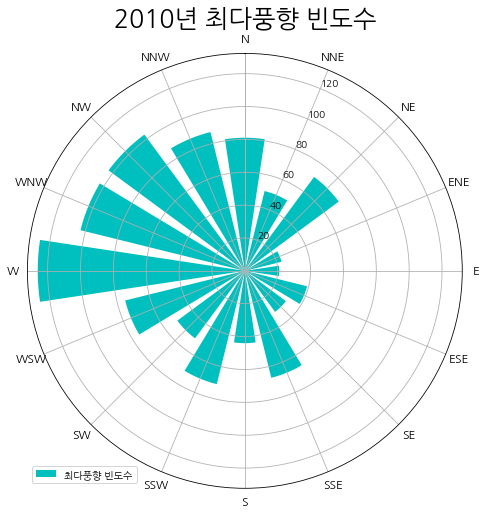

In [ ]:
# https://blog.naver.com/bamyam19/222405715959 참조한 극좌표계

# 16방위 축
label_loc = np.linspace(start = 0, stop = 2*np.pi, num = len(eng_16) + 1)

# x값 지정
theta = np.linspace(0, 2*np.pi, len(eng_16), endpoint = False)

# 극좌표계 도입
plt.figure(figsize= (8, 8))
ax = plt.subplot(polar=True)
ax.set_theta_zero_location("N") # 세타의 0도 시작은 "N"인 북으로 설정
ax.set_theta_direction(-1) # 세타 방향을 반대로(반시계 -> 시계)

# 차트생성
plt.xticks(label_loc, labels=eng_16, fontsize = 12)
plt.bar(theta, my_df['최다풍향(16방위)'], width = 0.3, color = 'c', label = '최다풍향 빈도수')

# 범례 및 제목넣기
plt.legend(loc = 'lower left')
plt.title('2010년 최다풍향 빈도수',size = 25)
plt.show()

In [ ]:
########## 우선 2010년 데이터 가공
my_df = pd.DataFrame() # 2010년 사계절 최다풍향 고유값 개수를 저장할 데이터프레임
df = weather_df.loc[weather_df['년'] == '2010', ['월', '최다풍향(16방위)']]

# 사계절별 고유값 개수
my_df['봄'] = df.loc[(df['월'] == '3') | (df['월'] == '4') | (df['월'] == '5'), '최다풍향(16방위)'].value_counts()
my_df['여름'] = df.loc[(df['월'] == '6') | (df['월'] == '7') | (df['월'] == '8'), '최다풍향(16방위)'].value_counts()
my_df['가을'] = df.loc[(df['월'] == '9') | (df['월'] == '10') | (df['월'] == '11'), '최다풍향(16방위)'].value_counts()
my_df['겨울'] = df.loc[(df['월'] == '12') | (df['월'] == '1') | (df['월'] == '2'), '최다풍향(16방위)'].value_counts()
my_df.rename(index = {360 : 0}, inplace = True) # 정렬을 위한 360도(북, N)를 0도로 변경
my_df.sort_index(inplace = True) # eng_16에 맞게 정렬
my_df

,봄,여름,가을,겨울
0,19,8,21,33
20,13,5,19,13
50,18,12,30,11
70,6,9,6,2
90,4,6,9,2
110,10,17,10,2
140,5,19,5,2
160,13,42,8,4
180,8,30,4,2
200,18,34,13,6


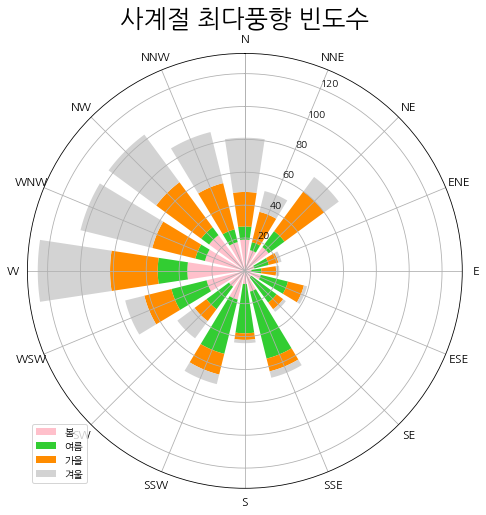

In [ ]:
# https://blog.naver.com/bamyam19/222405715959 참조한 극좌표계

# 16방위 축
label_loc = np.linspace(start = 0, stop = 2*np.pi, num = len(eng_16) + 1)

# x값 지정
theta = np.linspace(0, 2*np.pi, len(eng_16), endpoint = False)

# 극좌표계 도입
plt.figure(figsize= (8, 8))
ax = plt.subplot(polar=True)
ax.set_theta_zero_location("N") # 세타의 0도 시작은 "N"인 북으로 설정
ax.set_theta_direction(-1) # 세타 방향을 반대로(반시계 -> 시계)

# 차트생성
plt.xticks(label_loc, labels=eng_16, fontsize = 12)
plt.bar(theta, my_df['봄'], width = 0.3, color = 'pink', label = '봄')
plt.bar(theta, my_df['여름'], bottom = my_df['봄'], width = 0.3, color = 'limegreen', label = '여름')
plt.bar(theta, my_df['가을'], bottom = [a + b for (a, b) in zip(my_df['봄'], my_df['여름'])], width = 0.3, color = 'darkorange', label = '가을')
plt.bar(theta, my_df['겨울'], bottom = [a + b + c for (a, b, c) in zip(my_df['봄'], my_df['여름'], my_df['가을'])], width = 0.3, color = 'lightgray', label = '겨울')

# 범례 및 제목넣기
plt.legend(loc = 'lower left')
plt.title('사계절 최다풍향 빈도수',size = 25)
plt.show()

In [ ]:
## 날씨 데이터프레임에 PM10열 추가하기

## 다른 데이터프레임을 생성하는 방법
for year in df_dic.keys():
  my_df = df_dic[year][df_dic[year]['구분1'] == '도시대기']
  for month in my_df.columns[4:]:
    for area in my_df['구분2'].unique():    
      weather_df.loc[(weather_df['년'] == year[:-1]) & \
                     (weather_df['월'] == month[:-1]) & \
                     (weather_df['지점명'] == area), 'PM10'] = my_df.loc[my_df['구분2'] == area, month].sum() / \
                                                                my_df.loc[my_df['구분2'] == area, month].count()

## group을 이용한 방법
# for year in df_dic.keys():
#   grouped = df_dic[year].groupby(['구분1']) 
#   for month in df_dic[year].columns[4:]:
#     for area in grouped.get_group('도시대기')['구분2'].unique():    
#       weather_df.loc[(weather_df['년'] == year[:-1]) & \
#                      (weather_df['월'] == month[:-1]) & \
#                      (weather_df['지점명'] == area), 'PM10'] = grouped.get_group('도시대기').loc[grouped.get_group('도시대기')['구분2'] == area, month].sum() / \
#                                                                 grouped.get_group('도시대기').loc[grouped.get_group('도시대기')['구분2'] == area, month].count()

In [ ]:
# 데이터 확인
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12298 entries, 0 to 12320
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  12298 non-null  int64  
 1   지점명                 12298 non-null  object 
 2   일시                  12298 non-null  object 
 3   월합강수량(00~24h만)(mm)  12298 non-null  float64
 4   평균풍속(m/s)           12298 non-null  float64
 5   최다풍향(16방위)          12298 non-null  int64  
 6   년                   12298 non-null  object 
 7   월                   12298 non-null  object 
 8   PM10                1075 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 960.8+ KB


In [ ]:
# 미세먼지 데이터와 날씨 데이터간 상호존재하는 지역의 미세먼지 데이터 추가 확인
weather_df[weather_df['PM10'].notnull()]

,지점,지점명,일시,월합강수량(00~24h만)(mm),평균풍속(m/s),최다풍향(16방위),년,월,PM10
1371,108,서울,2010-01,29.3,2.3,290,2010,1,58.96
1372,108,서울,2010-02,55.3,2.4,290,2010,2,49.68
1373,108,서울,2010-03,82.5,2.9,70,2010,3,60.84
1374,108,서울,2010-04,62.8,2.9,290,2010,4,49.00
1375,108,서울,2010-05,124.0,2.6,290,2010,5,55.72
...,...,...,...,...,...,...,...,...,...
7757,239,세종,2020-08,501.1,1.4,160,2020,8,20.75
7758,239,세종,2020-09,171.3,1.5,70,2020,9,20.25
7759,239,세종,2020-10,6.4,1.2,320,2020,10,35.00
7760,239,세종,2020-11,50.1,1.2,320,2020,11,40.25


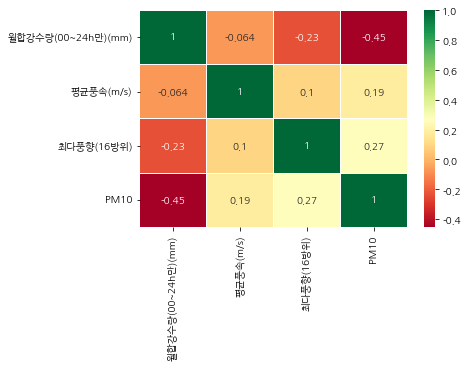

In [ ]:
# 날씨 데이터와 미세먼지 히트맵
sns.heatmap(weather_df[['월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '최다풍향(16방위)', 'PM10']].corr(), linewidths = 0.1, cmap = 'RdYlGn', linecolor = 'white', annot = True)
plt.show()

# 0 ~ 1 정상관(Positive Correlation)
# -1 ~ 0 부상관(Negative Correlation)
## 월합강수량은 높을 수록 PM10이 줄어드는 관계
## 최다풍향은 360(북) - 90(동) - 180(남) - 270(서) 이므로
##  양수로 나온 결과로 서쪽에서 바람이 불때(남, 남서, 북서, 북)가 동쪽(북, 북동, 남동, 남)에서보다 상관이 더 높다
## 평균풍속도 높을 수록 미세먼지와 관련이 높다는 걸 확인할 수 있음
## 즉 중국쪽에서 불어오는 미세먼지의 영향이 있다고 볼 수 있음